In [1]:
#Import libraries
import spacy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import re
import matplotlib.pyplot as plt

In [2]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

# Load the English model
nlp = spacy.load("en_core_web_sm")

Mounted at /content/drive


In [3]:
#Combine all news articles into a dataframe with the corresponding topic listed
#Preprocess data by removing Stop words and punctuation and lowercase text
path = '/content/drive/MyDrive/AAI520/MODULE3/News Articles/'
folders = os.listdir(path)
news = []
topic = []

for i in folders:
  path1 = path+i
  files = os.listdir(path1)
  for j in files:
    path2 = path1+'/'+j
    with open(path2, encoding="utf8", errors='ignore') as f:
      article =  " ".join(line.strip() for line in f)
      doc = nlp(article)
      sw = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
      text = ' '.join([str(elem) for elem in sw])
      text_low = text.lower()
    news.append(text_low)
    topic.append(i)

df = pd.DataFrame({'Text':news, 'Topic':topic})

print(df.sample(6))
print(df.shape)
print(df['Topic'].value_counts())

                                                   Text          Topic
90    burren awarded egyptian contracts   british en...       business
384   weak end year sales hit   said annual profit £...       business
829   bbc pour £ 9 m new comedy   bbc invest £ 9 m d...  entertainment
1476  blog picked word year   term blog chosen word ...           tech
702   springer criticises opera musical   talk host ...  entertainment
1631  cell hard sell   world casting gaze cell proce...           tech
(2225, 2)
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Topic, dtype: int64


In [4]:
#Split into test/train dataset
x = df['Text']
y = df['Topic']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

#Apply TF-IDF Vectorization on the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [5]:
#SVM Classifier
svm = SVC(kernel='rbf', C=1, probability=True, random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

In [6]:
#Naive Bayes Classifier
mnb = MultinomialNB(alpha=1)
mnb.fit(X_train_tfidf, y_train)
y_pred_mnb = mnb.predict(X_test_tfidf)

In [7]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
gbc.fit(X_train_tfidf, y_train)
y_pred_gbc = gbc.predict(X_test_tfidf)

In [8]:
#Evaluation function
def evaluate(y_test, y_pred, auc, cmc):
  accuracy_tfidf = accuracy_score(y_test, y_pred)
  precision_tfidf = precision_score(y_test, y_pred, average='weighted')
  recall_tfidf = recall_score(y_test, y_pred, average='weighted')
  f1_score_tfidf = f1_score(y_test, y_pred, average='weighted')
  auc_roc_tfidf = roc_auc_score(y_test, auc, multi_class='ovo', average='macro')
  print('Performance Evaluation:')
  print("Accuracy:", accuracy_tfidf)
  print("Precision:", precision_tfidf)
  print("Recall:", recall_tfidf)
  print("F1 Score:", f1_score_tfidf)
  print("AUC-ROC Score:", auc_roc_tfidf)

  confusion_matrix_tfidf = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_tfidf, display_labels=cmc)
  disp.plot()
  plt.xticks(rotation=90)
  plt.show()

Performance Evaluation:
Accuracy: 0.9775280898876404
Precision: 0.9776206604219438
Recall: 0.9775280898876404
F1 Score: 0.9775473229183075
AUC-ROC Score: 0.999326810902159


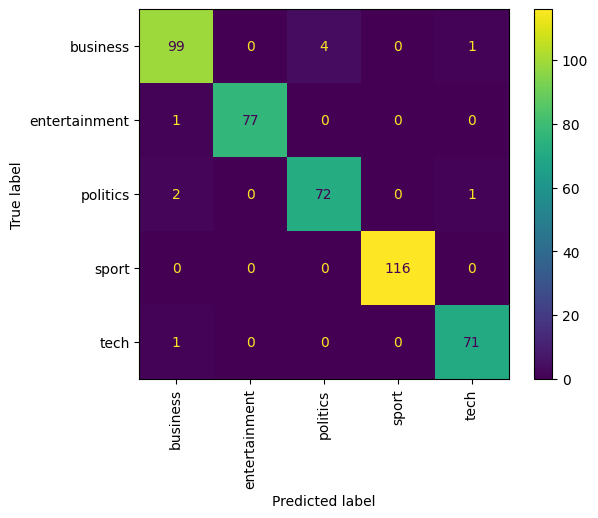

In [9]:
#Evaluate SVM model
evaluate(y_test, y_pred_svm, svm.predict_proba(X_test_tfidf), svm.classes_)

Performance Evaluation:
Accuracy: 0.9707865168539326
Precision: 0.9714957200635742
Recall: 0.9707865168539326
F1 Score: 0.970963414010628
AUC-ROC Score: 0.9987140825851867


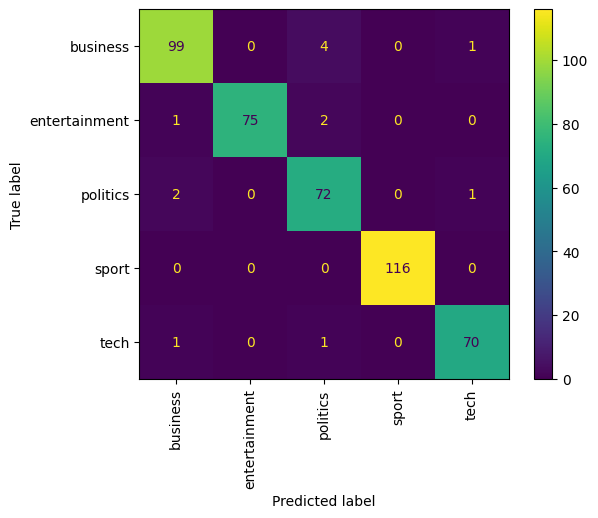

In [10]:
#Evaluate Naive Bayes model
evaluate(y_test, y_pred_mnb, mnb.predict_proba(X_test_tfidf), mnb.classes_)

Performance Evaluation:
Accuracy: 0.9550561797752809
Precision: 0.9557056049771763
Recall: 0.9550561797752809
F1 Score: 0.9551781228363079
AUC-ROC Score: 0.9957080204247811


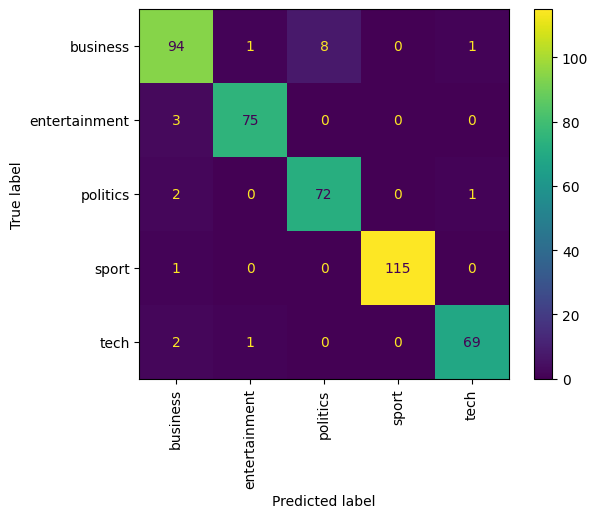

In [11]:
#Evaluate Gradient Boosting model
evaluate(y_test, y_pred_gbc, gbc.predict_proba(X_test_tfidf), gbc.classes_)